# HBM512 Homework-3 

## First Function

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
tol = 10e-8

def PolyCoefficients(x, coeffs):
    p = np.poly1d(coeffs)
    return np.polyval(p,x)

def PlotPolynomial(p):
    x = np.linspace(-1.2, 1.2, 100)
    plt.plot(x, PolyCoefficients(x, p.coeffs))
    plt.title(p)
    plt.axhline(y = 0, color = 'black', linestyle = '--')
    plt.axvline(x = 0, color = 'black', linestyle = '--')
    plt.xlabel('x values', fontsize=12)
    plt.ylabel('f(x)', fontsize=12)
    plt.show()

def ShowRoots(p):
    # Show first root
    x = np.linspace(-0.3,0, 100)
    plt.plot(x, PolyCoefficients(x,  p.coeffs))
    plt.title('Root in [-1,0]')
    plt.axhline(y = 0, color = 'black', linestyle = '--')
    plt.axvline(x = 0, color = 'black', linestyle = '--')
    plt.xlabel('x values', fontsize=12)
    plt.ylabel('f(x)', fontsize=12)
    # Annotate with text + Arrow
    plt.annotate(
    # Label and coordinate
    'This is the root!', xy=(-0.0406, 0), xytext=(-0.10, 40), arrowprops=dict(facecolor='green', shrink=0.05))
    plt.show()
    # Show second root
    x = np.linspace(0.8,1, 100)
    plt.plot(x, PolyCoefficients(x,  p.coeffs))
    plt.title('Root in [0,1]')
    plt.axhline(y = 0, color = 'black', linestyle = '--')
    # plt.axvline(x = 0, color = 'black', linestyle = '--')
    plt.xlabel('x values', fontsize=12)
    plt.ylabel('f(x)', fontsize=12)
    # Annotate with text + Arrow
    plt.annotate(
    # Label and coordinate
    'This is the root!', xy=(0.962, 0), xytext=(0.85,20), arrowprops=dict(facecolor='green', shrink=0.05))
    plt.show()
    
def my_bisection(f, a, b, tol, counter): 
    # Reference : https://byjus.com/maths/bisection-method/#:~:text=The%20bisection%20method%20is%20an,found%2C%20which%20is%20extremely%20small.
    # approximates a root, R, of f bounded 
    # by a and b to within tolerance 
    # | f(m) | < tol with m the midpoint 
    # between a and b Recursive implementation
    
    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "The scalars a and b do not bound a root")
            
    # get midpoint
    m = (a + b)/2
    
    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        print("Result is found in Iteration #", counter)
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        counter  += 1
        return my_bisection(f, m, b, tol, counter)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        counter  += 1
        return my_bisection(f, a, m, tol, counter)
    
def fixed_point_iteration(F, x0, tol):
    # Reference: https://www.bragitoff.com/2023/01/numerical-methods-for-root-finding-with-python-code/#:~:text=The%20Fixed%2DPoint%20Iteration%20method,of%20%24g(x)%24.
    counter = 0
    x1 = F(x0)
    while abs(x1 - x0) > tol:
        counter += 1 
        x0 = x1
        x1 = F(x0)
    print("Result is found in Iteration #", counter)
    return x1

def newton_raphson(p, x0, tol):
    p_deriv = p.deriv(1)
    F = lambda x: x - p(x)/p_deriv(x)
    return fixed_point_iteration(F,x0,tol)

def secant(f,x0,x1,tol, N =1000):
    step = 1
    condition = True
    while condition:
        if f(x0) == f(x1):
            print('Divide by zero error!')
            break
        
        x2 = x0 - (x1-x0)*f(x0)/( f(x1) - f(x0) ) 
        print('Iteration-%d, x2 = %0.6f and f(x2) = %0.6f' % (step, x2, f(x2)))
        x0 = x1
        x1 = x2
        step = step + 1
        
        if step > N:
            print('Not Convergent!')
            break
        
        condition = abs(f(x2)) > tol
    print('\n Required root is: %0.8f' % x2)



### Q1

In [2]:
coeffs = [230,18,9,-221,-9]
p = np.poly1d(coeffs)
p.coeffs

array([ 230,   18,    9, -221,   -9])

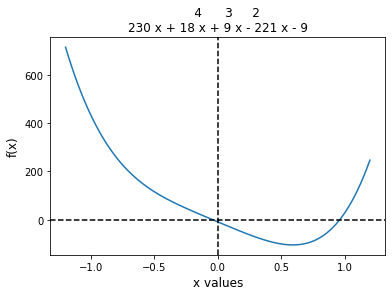

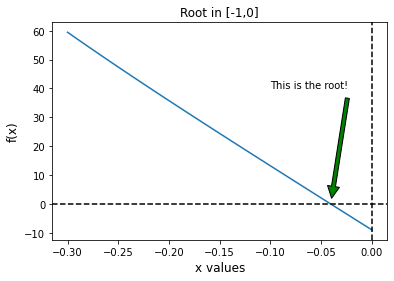

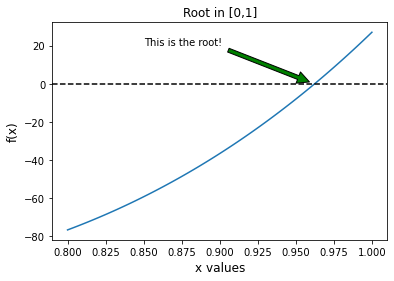

In [3]:
PlotPolynomial(p)
ShowRoots(p)

#### Bisection

In [4]:
my_bisection(p, -1 ,0, tol, 1)

Result is found in Iteration # 29


-0.04065928794443607

In [5]:
my_bisection(p, 0 ,1, tol, 1)

Result is found in Iteration # 31


0.9623984186910093

#### Fixed Point Iteration

In [6]:
F_denominator_coeffs = [230,18,9,-221]
F_den = np.poly1d(F_denominator_coeffs)
print(F_den)
F = lambda x: 9/np.polyval(F_den,x)
F_check = lambda x: 9/(230*x**3 + 18*x**2+ 9*x -221)

     3      2
230 x + 18 x + 9 x - 221


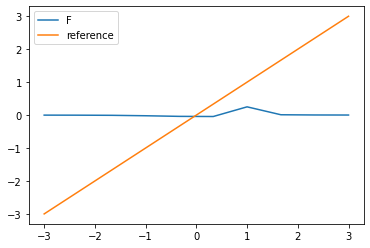

In [7]:
x = np.linspace(-3, 3, 10)
plt.plot(x,F(x), label = 'F')
# plt.plot(x, F_check(x), label = 'F_check')
plt.plot(x,x, label = 'reference')
plt.legend()

In [8]:
root = fixed_point_iteration(F,-1, tol)
root

Result is found in Iteration # 3


-0.040659288396971145

In [9]:
root = fixed_point_iteration(F, 0, tol)
root

Result is found in Iteration # 3


-0.04065928831549691

In [10]:
root = fixed_point_iteration(F, 0.9, tol)
root

Result is found in Iteration # 4


-0.04065928832049284

#### Newton-Raphson Method

Text(0.5, 1.0, 'F(x) for Newton-Raphson Method')

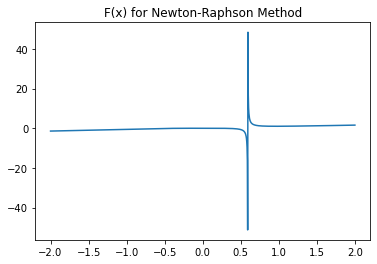

In [11]:
x = np.linspace(-2,2, 1000)
p_deriv = p.deriv(1)
F = lambda x: x - p(x)/p_deriv(x)
plt.plot(x,F(x))
plt.title('F(x) for Newton-Raphson Method')

In [12]:
newton_raphson(p, -0.5, tol)

Result is found in Iteration # 3


-0.04065928831575899

In [13]:
newton_raphson(p, 0.5, tol)

Result is found in Iteration # 5


-0.040659288315758865

In [14]:
for i in range(0,20,1):
    x0 = 0.5+0.01*i
    print("x0=",x0)
    print(newton_raphson(p, x0, tol))

x0= 0.5
Result is found in Iteration # 5
-0.040659288315758865
x0= 0.51
Result is found in Iteration # 5
-0.040659288315758865
x0= 0.52
Result is found in Iteration # 6
-0.04065928831575886
x0= 0.53
Result is found in Iteration # 6
-0.040659288315758865
x0= 0.54
Result is found in Iteration # 7
-0.040659288315758865
x0= 0.55
Result is found in Iteration # 8
-0.04065928831575886
x0= 0.56
Result is found in Iteration # 9
-0.040659288315758865
x0= 0.5700000000000001
Result is found in Iteration # 10
-0.040659288315758865
x0= 0.58
Result is found in Iteration # 12
-0.04065928831575887
x0= 0.59
Result is found in Iteration # 18
-0.040659288315758865
x0= 0.6
Result is found in Iteration # 14
0.9623984187505416
x0= 0.61
Result is found in Iteration # 11
0.9623984187505503
x0= 0.62
Result is found in Iteration # 10
0.9623984187505414
x0= 0.63
Result is found in Iteration # 9
0.9623984187505414
x0= 0.64
Result is found in Iteration # 8
0.9623984187505441
x0= 0.65
Result is found in Iteration # 

Text(0.5, 1.0, 'F(x) for Newton-Raphson Method')

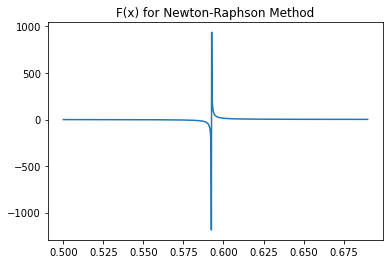

In [15]:
x = np.linspace(0.50,0.69, 1000)
p_deriv = p.deriv(1)
F = lambda x: x - p(x)/p_deriv(x)
plt.plot(x,F(x))
plt.title('F(x) for Newton-Raphson Method')

#### Secant

In [16]:
secant(p,-1,0, tol)

Iteration-1, x2 = -0.020362 and f(x2) = -4.496381
Iteration-2, x2 = -0.040691 and f(x2) = 0.007087
Iteration-3, x2 = -0.040659 and f(x2) = -0.000006
Iteration-4, x2 = -0.040659 and f(x2) = -0.000000

 Required root is: -0.04065929


In [17]:
secant(p,0,1, tol)

Iteration-1, x2 = 0.250000 and f(x2) = -62.507812
Iteration-2, x2 = 0.773763 and f(x2) = -83.830520
Iteration-3, x2 = -1.285418 and f(x2) = 879.638986
Iteration-4, x2 = 0.594596 and f(x2) = -104.691389
Iteration-5, x2 = 0.394641 and f(x2) = -88.128940
Iteration-6, x2 = -0.669318 and f(x2) = 183.713160
Iteration-7, x2 = 0.049714 and f(x2) = -19.961022
Iteration-8, x2 = -0.020754 and f(x2) = -4.409574
Iteration-9, x2 = -0.040735 and f(x2) = 0.016859
Iteration-10, x2 = -0.040659 and f(x2) = -0.000013
Iteration-11, x2 = -0.040659 and f(x2) = -0.000000

 Required root is: -0.04065929


In [18]:
secant(p,0.5,1, tol)

Iteration-1, x2 = 0.894221 and f(x2) = -39.490828
Iteration-2, x2 = 0.957046 and f(x2) = -3.528457
Iteration-3, x2 = 0.963210 and f(x2) = 0.542027
Iteration-4, x2 = 0.962390 and f(x2) = -0.005855
Iteration-5, x2 = 0.962398 and f(x2) = -0.000010
Iteration-6, x2 = 0.962398 and f(x2) = 0.000000

 Required root is: 0.96239842


## Second Function

In [19]:
def PlotCubeRoot():
    x = np.linspace(0, 20, 1000)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, np.cbrt(x), '-gD', markevery=[550])
    # Add rectangle
    ax.add_patch(
    patches.Rectangle((-0.5, 2.1), # (x,y)
                        12, # width
                        0.3, # height
                        # You can add rotation as well with 'angle'
                        alpha=0.3, facecolor="red", edgecolor="black", linewidth=3, linestyle='solid')
    )
    plt.title('Cube Roots')
    plt.axhline(y = 0, color = 'black', linestyle = '--')
    plt.axvline(x = 0, color = 'black', linestyle = '--')
    plt.axvline(x = 11, color = 'red', linestyle = '--')
    plt.xlabel('x values', fontsize=12)
    plt.ylabel('f(x)', fontsize=12)
    plt.show() 

In [20]:
coeffs = [1, 0, 0, -11]
f= np.poly1d(coeffs)
print(f)

   3
1 x - 11


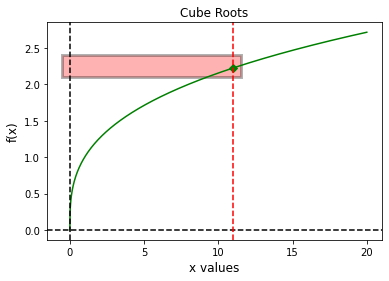

In [21]:
PlotCubeRoot()

#### Bisection

In [22]:
my_bisection(f,2,2.5, tol, 1)

Result is found in Iteration # 25


2.2239800840616226

#### Fixed Point Iteration

In [23]:
F = lambda x: 11/(x*x)
fixed_point_iteration(F, 2.2, tol)

ZeroDivisionError: float division by zero

#### Newton-Raphson Method

Text(0.5, 1.0, 'F(x) for Newton-Raphson Method')

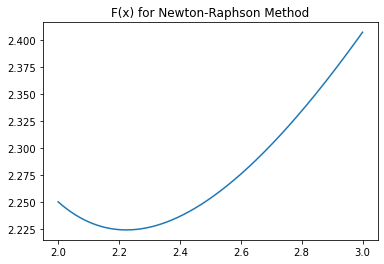

In [24]:
x = np.linspace(2,3, 1000)
f_deriv = f.deriv(1)
F = lambda x: x - f(x)/f_deriv(x)
plt.plot(x,F(x))
plt.title('F(x) for Newton-Raphson Method')

In [25]:
newton_raphson(f, 2, tol)

Result is found in Iteration # 3


2.223980090569316